In [1]:
%matplotlib inline
import numpy 
import matplotlib.pyplot as plt
import scipy.optimize
import math

In [2]:
def length(v1):
    '''
    finds the length of a vector
    
    :param v1: the vector
    :type v1: tuple or list of floats
    :rtype: float
    '''
    v1 = numpy.array(v1).flatten()
    l = (v1.dot(v1))**.5
    return l

def inner_angle(v1,v2):
    '''
    finds the interior angle between two vectors
    
    :param v1: the first vector
    :type v1: tuple or list of floats
    :param v2: the second vector
    :type v2: tuple or list of floats
    :rtype: float
    '''
    v1 = numpy.array(v1).flatten()
    l1 = length(v1)
    v2 = numpy.array(v2).flatten()
    l2 = length(v2)
    cost = numpy.dot(v1,v2)/l1/l2
    t = math.acos(cost)
    return t

def total_angle(v1,v2,v3=None):
    '''
    finds the interior angle between two vectors
    
    :param v1: the first vector
    :type v1: tuple or list of floats
    :param v2: the second vector
    :type v2: tuple or list of floats
    :rtype: float
    '''

    v1 = numpy.array(v1).flatten()
    if len(v1)==2:
        v1 = numpy.r_[v1,0]
        v3 = numpy.array([0,0,1])

        v2 = numpy.array(v2).flatten()
    if len(v2)==2:
        v2 = numpy.r_[v2,0]
        v3 = numpy.array([0,0,1])

    costheta = numpy.dot(v1,v2)
    sintheta  = numpy.cross(v1,v2)
    l_sintheta = length(sintheta)
    neg = sintheta.dot(v3)
    if neg<0:
        neg = -1
    else:
        neg=1
    theta = math.atan2(neg*l_sintheta,costheta)
    return theta  

def angle_between_planes(v1,v2,v3):
    '''measures the angle between planes.  
    v1 and v2 are two vectors which define one plane
    v2 and v3 define the third plane.'''
    
    n1 = numpy.cross(v1,v2)
    n2 = numpy.cross(v2,v3)
    return total_angle(n1,n2,v2)

In [3]:
p0_ini = 0,0
p1_ini = -3,0
p2_ini = 0,-1
p3_ini = -4,-7
p6_ini = (numpy.array(p2_ini)+numpy.array(p3_ini))/2
p4_ini = (numpy.array(p2_ini)+numpy.array(p6_ini))/2
p5_ini = (numpy.array(p1_ini)+numpy.array(p4_ini))/2
p_ini = numpy.array([p0_ini,p1_ini,p2_ini,p3_ini,p4_ini,p5_ini])
point_text = ['p0','p1','p2','p3','p4','p5']
vector_text = ['v0','v1','v2','v3','v4']
vector_order = []
vector_order.append((0,1))
vector_order.append((2,3))
vector_order.append((0,2))
vector_order.append((1,4))
vector_order.append((3,5))
#vector_order.append((2,5))
vector_order = numpy.array(vector_order)
v_ini = p_ini[vector_order[:,1]]-p_ini[vector_order[:,0]]
text_offset = .25,.25
text_location = (p_ini[vector_order[:,1]]+p_ini[vector_order[:,0]])/2 +numpy.array(text_offset)


In [4]:
v_ini

array([[-3.  ,  0.  ],
       [-4.  , -6.  ],
       [ 0.  , -1.  ],
       [ 2.  , -2.5 ],
       [ 2.  ,  5.75]])

In [5]:
vector_order
v_ini

array([[-3.  ,  0.  ],
       [-4.  , -6.  ],
       [ 0.  , -1.  ],
       [ 2.  , -2.5 ],
       [ 2.  ,  5.75]])

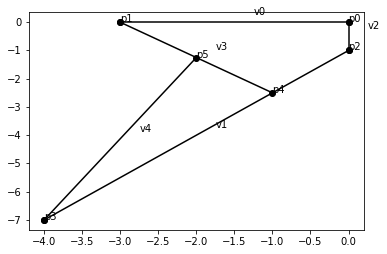

In [6]:
def plot_mechanism(point_location,text_location=None):
    for item in vector_order:
        plt.plot(*(point_location[item,:3].T),'ko-')

    if text_location is not None:
        for item,text in zip(point_location,point_text):
            ax.text(x=item[0],y=item[1],s=text)

        for item,text in zip(text_location,vector_text):
            ax.text(x=item[0],y=item[1],s=text)
            
fig = plt.figure();
ax = fig.add_subplot(111)
plot_mechanism(p_ini,text_location)
plt.show()

In [7]:
def gen_function(q1,dl1,dl2,dl3,dl4,dl5):
    def calc_fourbar(arguments):
        # break arguments variable into 8 discrete variables, 2 for each planar point in the four-bar linkage
        x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5 = arguments
        
        #Create five points: p1, p2, p3, p4
        p0 = numpy.array([x0,y0])
        p1 = numpy.array([x1,y1])
        p2 = numpy.array([x2,y2])
        p3 = numpy.array([x3,y3])
        p4 = numpy.array([x4,y4])
        p5 = numpy.array([x5,y5])

        #create new point array using inputs of function
        p = numpy.array([p0,p1,p2,p3,p4,p5])
        
        #inputv = p[5]-p[2]
        #create new vector array using vector ordering defined above
        v = p[vector_order[:,1]]-p[vector_order[:,0]]
        
        #create new length vector
        l = [length(item) for item in v]

        # Define the x and y axis unit vectors
        x_axis = numpy.array([1,0])
        y_axis = numpy.array([0,1])

        # define the error variable for holding all mechanism error calcs
        error = []

        # Compute the error in the structure as the absolute, cumulative 
        # difference between the link lengths and their desired lengths
        error.append([l[0]-dl1])
        error.append([l[1]-dl2])
        error.append([l[2]-dl3])
        error.append([l[3]-dl4])
        error.append([l[4]-dl5])
        #error.append([l[5]-dl6])
        
        # add the desired input angle q1 minus the actual angle as another error component to be solved
        error.append(inner_angle(v[0],v[2])-(q1*180/math.pi)-90)
        
        # add two more constraints defining p0 as fixed at (0,0)
        error.append([p[0,0]-0])
        error.append([p[0,1]-0])
        
        # add two more constraints defining p1 as fixed at (6,0)
        error.append([p[1,0]-(-3)])
        error.append([p[1,1]-0])
        
        
        #define constraint of p0 and p4
       
        
        # define v4 to be parrallel to v1
        #error.append([inner_angle(v[0],x_axis)-0])
        #error.append([inner_angle(v[3],v[0])-0])
        

        # turn the error list into a vector
        error1 =numpy.array(error)
        
        # return the square root of the sum of squared errors.  The length function that we wrote earlier does that.
        return length(error1)
    
    return calc_fourbar

In [8]:
ini = list(p_ini.flatten())
design = numpy.array([3, 9, 1, 5.0, 7])
q1 = 90
function=gen_function(q1,*design)
result = scipy.optimize.minimize(function,ini)
x= result.x 
x=x.reshape((5,2))
result.fun

<ipython-input-7-8f0f64ac4698>:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  error1 =numpy.array(error)


TypeError: can't multiply sequence by non-int of type 'list'